----
# 3. Digits Data Set


In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
from sklearn.datasets import fetch_lfw_people, load_digits

sk_data = load_digits();

In [2]:
from ipywidgets import interact
def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

In [4]:
feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names

n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

In [9]:
#Number of samples, number of features, number of classes, and the shape of the image dimensions:
print(len(feature_vectors))
print(len(class_labels))
print(n_samples)
sk_data.images.shape

1797
1797
1797


(1797, 8, 8)

1. **n_samples:** Total number of images in the digits dataset. 
2. **n_features:** Total number of features in the digits dataset
3. **n_classes:** Total number of classes in the digits dataset
4. **N:** number
5. **h:** height
6. **w:** width


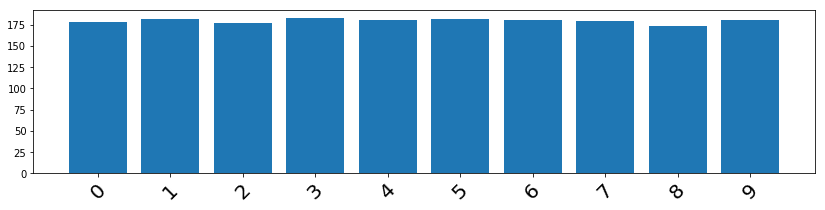

In [11]:
plt.figure(figsize=(14, 3))

y_unique = np.unique(class_labels)
counts = [(class_labels == i).sum() for i in y_unique]

plt.xticks(y_unique,  categories[y_unique])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, size=20)
_ = plt.bar(y_unique, counts)

Split the input data into separate training and testing sets.  Make sure you keep the feature vectors and classes together. 

In [27]:
# Split the input data into separate training and testing sets
import pandas as pd

train_vectors = feature_vectors[1:int(len(feature_vectors)*.75),:]
test_vectors = feature_vectors[int(len(feature_vectors)*.75)+1:len(feature_vectors),:]
train_labels = class_labels[1:int(len(class_labels)*.75)]
test_labels = class_labels[int(len(class_labels)*.75)+1:len(feature_vectors)]

In [1]:
# Train SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import time
start = time.time()

#Temporary variables
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

end = time.time()
print("Runtime",end - start)

NameError: name 'train_vectors' is not defined

----
## Results on Testing Data

In [30]:
###############################################################################
# Quantitative evaluation of the model quality on the test set

#make some temporary variables so you can change this easily
predict_vectors = test_vectors
true_lables = test_labels

print("Predicting names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_lables, pred_labels))
print(confusion_matrix(true_lables, pred_labels, labels=range(n_classes)))


Predicting names on the test set
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.98      1.00      0.99        46
          2       1.00      1.00      1.00        43
          3       1.00      0.89      0.94        46
          4       0.98      0.94      0.96        48
          5       0.94      0.98      0.96        45
          6       0.98      1.00      0.99        47
          7       0.96      1.00      0.98        45
          8       0.91      0.95      0.93        41
          9       0.93      0.91      0.92        45

avg / total       0.97      0.96      0.96       449

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  2  0  0  3  0]
 [ 0  0  0  0 45  0  0  0  0  3]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  1 39  0]
 [ 1  0  0  0  0  1  0  1  1 41

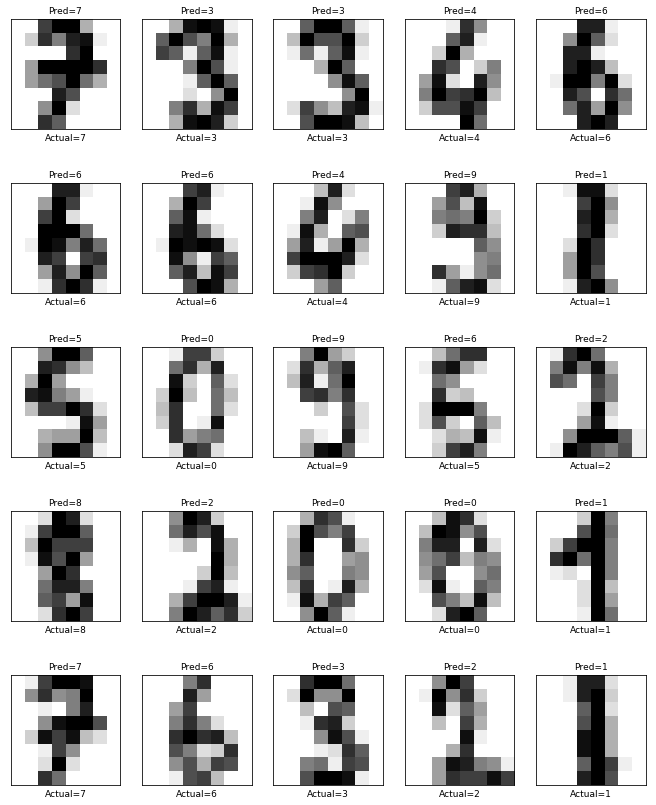

In [31]:
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        plt.title('Pred='+str(categories[pred_titles[i]]), size=9)
        plt.xlabel('Actual='+str(categories[true_titles[i]]), size=9)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_vectors, test_labels, pred_labels, h,w)

The classifier is doing great with a 96% precision.